# Ejemplo de uso de CNN
## Obtenido de: https://github.com/tensorchiefs/dl_book/blob/master/chapter_02/nb_ch02_03.ipynb
***
Para predicción de imágenes con bordes verticales


In [1]:
# módulos necesarios
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation
from tensorflow.keras.utils import to_categorical 

## Generación de imágenes

In [2]:
# función que genera imágenes sintéticas con bordes
# verticales y bordes horizontales

def generate_image_with_bars(size, bar_nr, vertical = True):
    # matriz de de sizexsizex1 (1 canal)
    img=np.zeros((size,size,1),dtype="uint8")
    for i in range(0,bar_nr):
        x,y = np.random.randint(0,size,2)
        l  = int(np.random.randint(y,size,1))
    if (vertical):
        img[y:l,x,0]=255 #agrega bordes vercticales
    else:
        img[x,y:l,0]=255 #agrega bordes horizontales
    return img  

## Visualización de imágenes

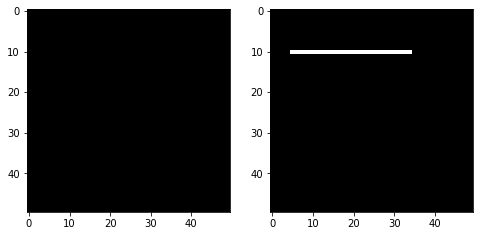

In [3]:
# visualización de dos imágenes

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
img=generate_image_with_bars(50,10, vertical=True)
plt.imshow(img[:,:,0],cmap='gray')
plt.subplot(1,2,2)
img=generate_image_with_bars(50,10, vertical=False)
plt.imshow(img[:,:,0],cmap='gray')

In [4]:
pixel=50  # define alto y ancho de las imagenes
num_images_train = 1000 #número de datos de entrenamiento 
num_images_val = 1000 # número de imágenes de validación

# generación de datos de entrenamiento con bordes verticales
X_train =np.zeros((num_images_train,pixel,pixel,1))
for i in range(0, int(num_images_train/2)):
    X_train[i]=generate_image_with_bars(pixel,10)

# generación de datos de entrenamiento con bordes horizontales
for i in range(int(num_images_train/2), num_images_train):
    X_train[i]=generate_image_with_bars(pixel,10, vertical=False)

# generación de datos de validación con bordes verticales
X_val =np.zeros((num_images_train,pixel,pixel,1))
for i in range(0, int(num_images_train/2)): 
    X_val[i]=generate_image_with_bars(pixel,10)

# generación de datos de validación con bordes horizontales
for i in range(int(num_images_train/2), num_images_train):
    X_val[i]=generate_image_with_bars(pixel,10, vertical=False)


# Normalización de los datos entre 0 y 1
X_train=X_train/255
X_val=X_val/255

print(X_train.shape)
print(X_val.shape)

(1000, 50, 50, 1)
(1000, 50, 50, 1)


In [5]:
# Generación de etiquetas

y = np.array([[0],[1]])
# ejemplo
# >> x = np.array([[1,2],[3,4]])
# >> np.repeat(x, 2)
# array([1, 1, 2, 2, 3, 3, 4, 4])
Y_train = np.repeat(y, num_images_train//2)
Y_val = np.repeat(y, num_images_train//2)

In [6]:
print(Y_train.shape)
print(Y_train)

(1000,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 

In [7]:
# one-hot-encoding
Y_train=to_categorical(Y_train,2)
Y_val=to_categorical(Y_val,2)

In [8]:
Y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

## Red Convolucional 

In [9]:
model = Sequential()
model.add(Convolution2D(1,(5,5),padding='same',input_shape=(pixel,pixel,1)))
model.add(Activation('linear'))

# toma el valor máximo del mapa de características
model.add(MaxPooling2D(pool_size=(pixel,pixel)))

# aplanamiento
model.add(Flatten()) 

# capa densa con dos neuronas para generar la clasificación
model.add(Dense(2))
model.add(Activation('softmax'))

# compile model and initialize weights
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
# let's summarize the CNN architectures along with the number of model weights
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 1)         26        
_________________________________________________________________
activation (Activation)      (None, 50, 50, 1)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 1)           0         
_________________________________________________________________
flatten (Flatten)            (None, 1)                 0         
_________________________________________________________________
dense (Dense)                (None, 2)                 4         
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 30
Trainable params: 30
Non-trainable params: 0
____________________________________________________________

In [11]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(1000, 50, 50, 1)
(1000, 2)
(1000, 50, 50, 1)
(1000, 2)


In [12]:
# train the model
history=model.fit(X_train, Y_train,
                  validation_data=(X_val,Y_val),
                  batch_size=64, 
                  epochs=200,
                  verbose=0,
                  shuffle=True) #shuffle: Boolean (whether to shuffle the training data before each epoch)

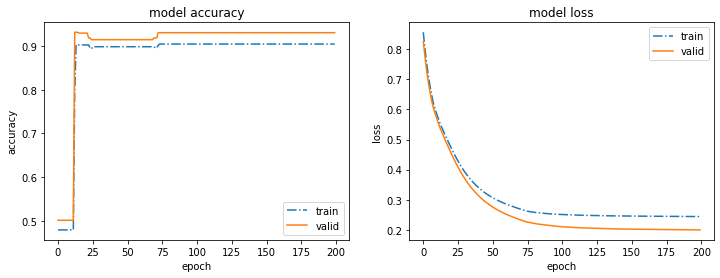

In [13]:
# plot the development of the accuracy and loss during training
plt.figure(figsize=(12,4))
plt.subplot(1,2,(1))
plt.plot(history.history['accuracy'],linestyle='-.')
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,(2))
plt.plot(history.history['loss'],linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')


In [19]:
model.get_weights()[0].shape

(5, 5, 1, 1)

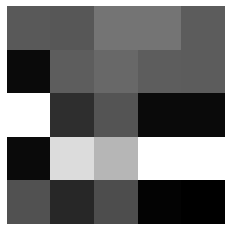

In [14]:
# get the leared weights and display them as image
conv_filter=model.get_weights()[0]
conv_filter.shape
conv_filter=np.squeeze(conv_filter, axis=2)

plt.figure()
plt.imshow(conv_filter[:,:,0],"gray")
plt.axis("off")
plt.show()

In [20]:
len(model.get_weights())

4

In [21]:
all_weights = model.get_weights()

In [22]:
print(all_weights[0].shape)
print(all_weights[1].shape)
print(all_weights[2].shape)
print(all_weights[3].shape)

(5, 5, 1, 1)
(1,)
(1, 2)
(2,)


In [25]:
# conv_filter=model.get_weights()[0]
print(conv_filter.shape)

(5, 5, 1)


In [26]:
print(conv_filter*255)

[[[ -58.11688 ]
  [ -63.7135  ]
  [ -20.568354]
  [ -19.970716]
  [ -56.34064 ]]

 [[-177.41934 ]
  [ -54.413742]
  [ -37.451637]
  [ -54.20871 ]
  [ -55.481976]]

 [[ 186.53473 ]
  [-124.067444]
  [ -67.90585 ]
  [-176.95917 ]
  [-177.80771 ]]

 [[-176.8767  ]
  [ 133.7498  ]
  [  77.83241 ]
  [ 186.64223 ]
  [ 186.36926 ]]

 [[ -69.86487 ]
  [-134.03633 ]
  [ -77.956726]
  [-187.40204 ]
  [-192.67383 ]]]


In [27]:
pred = model.predict(X_val)

In [28]:
pred

array([[0.889504  , 0.11049601],
       [0.889504  , 0.11049601],
       [0.889504  , 0.11049601],
       ...,
       [0.05249255, 0.9475075 ],
       [0.0032778 , 0.99672216],
       [0.0032778 , 0.99672216]], dtype=float32)

## Predicción en imágnes de validación

In [46]:
pred_bin = np.argmax(pred, axis=1)

In [39]:
Y_val_bin = np.argmax(Y_val, axis=1)

In [41]:
from sklearn.metrics import confusion_matrix, classification_report



In [44]:
print(classification_report(Y_val_bin, pred_bin))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       500
           1       0.94      0.92      0.93       500

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



In [45]:
confusion_matrix(Y_val_bin, pred_bin)

array([[472,  28],
       [ 42, 458]])